![Ejercicio 1 - Playground Tensorflow](CapturaTensorflow.png)

[Enlace](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=8,6,2&seed=0.73186&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

def spiral(puntos, ruido=.5):
    angulos = np.sqrt(np.random.rand(puntos, 1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(angulos)*angulos + np.random.rand(puntos, 1) * ruido
    d1y = np.sin(angulos)*angulos + np.random.rand(puntos, 1) * ruido
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), np.hstack((np.zeros(puntos),np.ones(puntos))))

X, y = spiral(500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Configuracion 1
model1 = Sequential()

model1.add(Dense(8, input_dim=2, kernel_initializer='normal', activation='relu'))
model1.add(Dense(6, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
opt = Adam(0.03)
model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(X_train, y_train,epochs=1000,batch_size=512,validation_data=(X_test, y_test),verbose=0)

2024-04-09 00:53:45.473026: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
 104/5000 ━━━━━━━━━━━━━━━━━━━━ 4s 978us/step

/var/folders/7f/fkg5g4ls67x0xs7b0rml3_zr0000gn/T/ipykernel_89425/2998478698.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm.get_cmap('coolwarm', 2))
/var/folders/7f/fkg5g4ls67x0xs7b0rml3_zr0000gn/T/ipykernel_89425/2998478698.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  axs[1].scatter(X_test[:, 0], X_test[:, 1], c=predictions_test[:, 0], cmap=cm.get_cmap('coolwarm'))


5000/5000 ━━━━━━━━━━━━━━━━━━━━ 5s 974us/step


/var/folders/7f/fkg5g4ls67x0xs7b0rml3_zr0000gn/T/ipykernel_89425/2998478698.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  axs[1].contourf(gx, gy, prediction_grid, cmap=cm.get_cmap('coolwarm'), alpha=0.8)


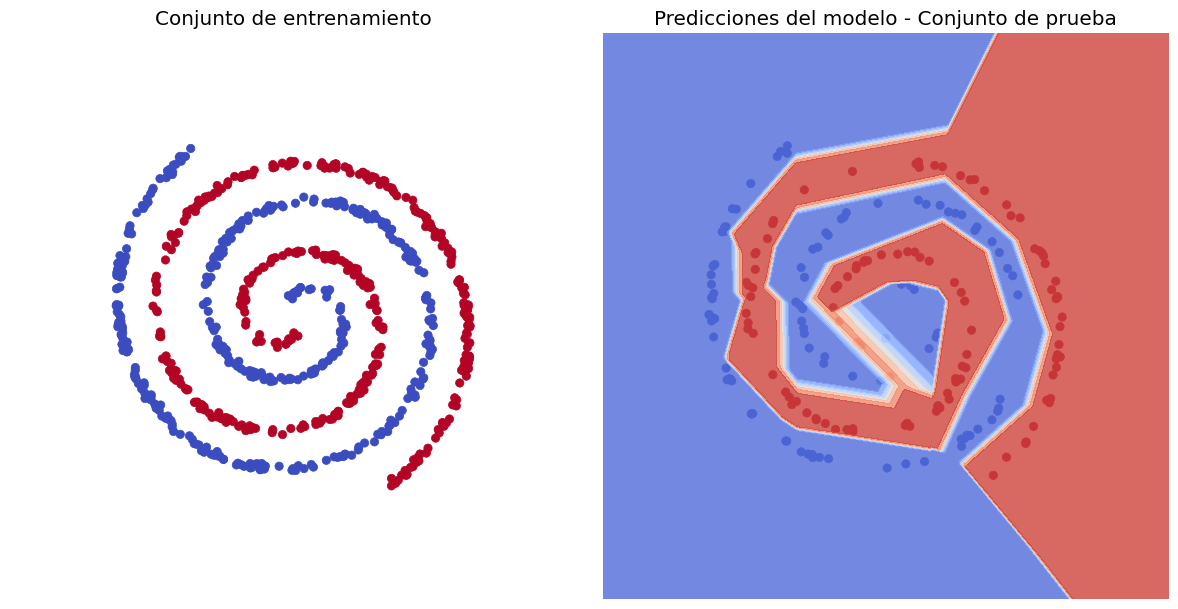

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use('ggplot')

def plot_model_predictions(model, X_train, X_test, y_train, title_train, title_test):

    predictions_test = model.predict(X_test)
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Conjunto de entrenamiento
    axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm.get_cmap('coolwarm', 2))
    axs[0].set_title(title_train)
    axs[0].set_aspect('equal')

    # Predicciones del modelo en el conjunto de prueba
    axs[1].scatter(X_test[:, 0], X_test[:, 1], c=predictions_test[:, 0], cmap=cm.get_cmap('coolwarm'))
    axs[1].set_title(title_test)
    axs[1].set_aspect('equal')

    # Frontera de decisión 
    gx, gy = np.meshgrid(np.linspace(-20, 20, 400), np.linspace(-20, 20, 400))
    prediction_grid = model.predict(np.c_[gx.ravel(), gy.ravel()])
    prediction_grid = prediction_grid.reshape(gx.shape)
    axs[1].contourf(gx, gy, prediction_grid, cmap=cm.get_cmap('coolwarm'), alpha=0.8)
    
    for ax in axs:
        ax.set_xlim([-20, 20])
        ax.set_ylim([-20, 20])
        ax.grid(False)
        ax.axis('off')

    # Ajustar el espaciado entre subplots
    plt.tight_layout()
    plt.show()


plot_model_predictions(model1, X_train, X_test, y_train, 'Conjunto de entrenamiento', 'Predicciones del modelo - Conjunto de prueba')


In [4]:
# Configuracion 2
model2 = Sequential()
model2.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))  # Aumento el número de neuronas en la primera capa oculta
model2.add(Dense(10, activation='relu'))  # Agrego otra capa oculta
model2.add(Dense(1, activation='sigmoid'))
opt = Adam(0.03)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train, y_train,epochs=1000,batch_size=512,validation_data=(X_test, y_test),verbose=0)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
 104/5000 ━━━━━━━━━━━━━━━━━━━━ 4s 980us/step

/var/folders/7f/fkg5g4ls67x0xs7b0rml3_zr0000gn/T/ipykernel_89425/2998478698.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm.get_cmap('coolwarm', 2))
/var/folders/7f/fkg5g4ls67x0xs7b0rml3_zr0000gn/T/ipykernel_89425/2998478698.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  axs[1].scatter(X_test[:, 0], X_test[:, 1], c=predictions_test[:, 0], cmap=cm.get_cmap('coolwarm'))


5000/5000 ━━━━━━━━━━━━━━━━━━━━ 5s 977us/step


/var/folders/7f/fkg5g4ls67x0xs7b0rml3_zr0000gn/T/ipykernel_89425/2998478698.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  axs[1].contourf(gx, gy, prediction_grid, cmap=cm.get_cmap('coolwarm'), alpha=0.8)


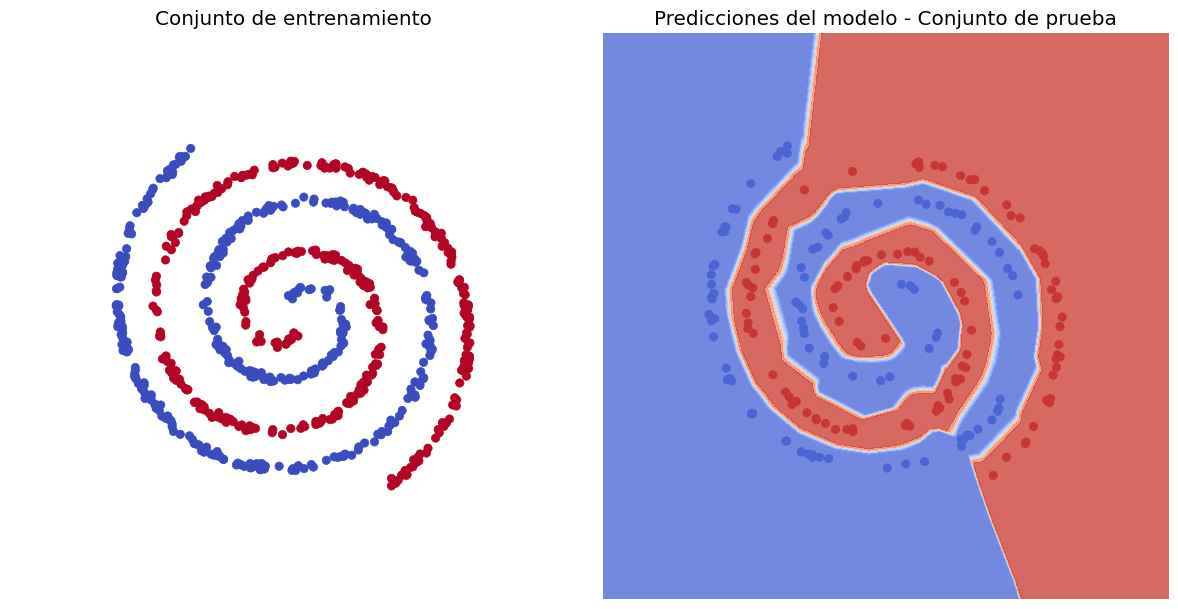

In [5]:
# Predicciones del primer modelo en el conjunto de prueba
plot_model_predictions(model2, X_train, X_test, y_train, 'Conjunto de entrenamiento', 'Predicciones del modelo - Conjunto de prueba')


In [6]:
# Parte de este código fue adaptado de Master Data Science (https://datahacker.rs/implementing-shallow-neural-network-keras-spiral-shaped-dataset/)